# Принятие решений в бизнесе

## Описание проекта

Данный проект является аналитикой крупного интернет-магазина. Вместе с отделом маркетинга мы проводим исследование на базе подготовленных гипотез для увеличения выручки.

Для проведения аналитики будут использованы такие данные, как гипотезы, информация о заказах и посетителях интернет-магазина.

## Цель проекта

Цель данной проектной работы заключается в следующем:

1. Приоритизация подготовленных гипотез для увеличения выручки;
2. Полноценное проведение A/B-теста с анализом данных и построением различных графиков;
3. Итоговый анализ результатов.

## Описание данных

Для работы над проектом в распоряжении находятся три датасета.

1. `hypothesis.csv` - хранит информацию о составленных гипотезах;
2. `orders.csv` — хранит информацию о заказах;
3. `visitors.csv` — хранит информацию о посетителях.

### hypothesis.csv

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### orders.csv

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

### costs_info_short

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

# Загрузка и изучение данных

## Импортирование библиотек и загрузка датасетов

Импортируем все необходимые для анализа данных библиотеки:

In [1]:
# библиотеки для работы с таблицам данных, массивами чисел и числами
import pandas as pd # для работы с таблицами данных
import numpy as np # для работы с массивами чисел
import math # для работы с числами
import scipy.stats as stats

# для работы с форматами даты 
from datetime import date, datetime, timedelta

# для визуализации данных
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

Загрузим наши датасеты и переведем их в датафреймы pandas.

В случае, если датасет недоступен по ссылке - он может быть загружен с локального диска.

In [2]:
try:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('datasets/hypothesis.csv')
    orders = pd.read_csv('datasets/orders.csv')
    visitors = pd.read_csv('datasets/visitors.csv')  

Настройка вывода данных

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = None
pd.options.display.float_format = '{:.2f}'.format

## Изучение данных

Рассмотрим имеющиеся данные. Изучим доступные нам три датасета.

Воспользуемся функцией с выводом общей информации о датасете, и применим ее к каждому из датасетов.

In [4]:
# Функция вывода информации о датафрейме
def df_information(df):
    print('\033[1m' + 'Общая информация о датафрейме' + '\033[0m')
    print(df.info())
    print()
    print('\033[1m' + 'Рандомные 5 строк датафрейма' + '\033[0m')
    pd.set_option('display.max_columns', None)
    display(df.sample(5))
    print('\033[1m' + 'Вывод статистики по датафрейму' + '\033[0m')
    print(df.describe().applymap(lambda x: f'{x:,.2f}'))
    print('\033[1m' + 'Проверка датафрейма на наличие явных дубликатов. Их количество:' + '\033[0m')
    display(df.duplicated().sum())
    print()
    print('\033[1m' + 'Доля пропущенных значений среди всех данных:' + '\033[0m')
    display(df.isna().mean())
    print()
    print('\033[1m' + 'Количество пропущенных значений среди всех данных:' + '\033[0m')
    display(df.isnull().sum())

### Датасет 'hypothesis'

In [5]:
# применение функции к датафрейму 'hypothesis'

df_information(hypothesis)

Общая информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Рандомные 5 строк датафрейма


,Hypothesis,Reach,Impact,Confidence,Efforts
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6


Вывод статистики по датафрейму
       Reach Impact Confidence Efforts
count   9.00   9.00       9.00    9.00
mean    4.78   4.78       5.56    4.89
std     3.15   3.19       3.05    2.80
min     1.00   1.00       1.00    1.00
25%     3.00   3.00       3.00    3.00
50%     3.00   3.00       7.00    5.00
75%     8.00   7.00       8.00    6.00
max    10.00  10.00       9.00   10.00
Проверка датафрейма на наличие явных дубликатов. Их количество:


0


Доля пропущенных значений среди всех данных:


Hypothesis   0.00
Reach        0.00
Impact       0.00
Confidence   0.00
Efforts      0.00
dtype: float64


Количество пропущенных значений среди всех данных:


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

### Датасет 'orders'

In [6]:
# применение функции к датафрейму 'orders'

df_information(orders)

Общая информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Рандомные 5 строк датафрейма


,transactionId,visitorId,date,revenue,group
722,3517061727,4062055840,2019-08-05,6990,A
484,2631228632,1772171838,2019-08-06,6260,A
14,3859315276,1565034404,2019-08-15,10980,A
160,1941376795,4012829377,2019-08-22,18900,B
191,2361024027,3967698036,2019-08-02,1690,A


Вывод статистики по датафрейму
          transactionId         visitorId       revenue
count          1,197.00          1,197.00      1,197.00
mean   2,155,621,385.53  2,165,960,143.10      8,348.01
std    1,229,084,904.76  1,236,014,192.15     39,191.13
min        1,062,393.00      5,114,589.00         50.00
25%    1,166,775,572.00  1,111,826,046.00      1,220.00
50%    2,145,193,898.00  2,217,984,702.00      2,978.00
75%    3,237,740,112.00  3,177,606,451.00      8,290.00
max    4,293,855,558.00  4,283,872,382.00  1,294,500.00
Проверка датафрейма на наличие явных дубликатов. Их количество:


0


Доля пропущенных значений среди всех данных:


transactionId   0.00
visitorId       0.00
date            0.00
revenue         0.00
group           0.00
dtype: float64


Количество пропущенных значений среди всех данных:


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

### Датасет 'visitors'

In [7]:
# применение функции к датафрейму 'visitors'

df_information(visitors)

Общая информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Рандомные 5 строк датафрейма


,date,group,visitors
57,2019-08-27,B,720
40,2019-08-10,B,369
33,2019-08-03,B,509
44,2019-08-14,B,746
60,2019-08-30,B,490


Вывод статистики по датафрейму
      visitors
count    62.00
mean    607.29
std     114.40
min     361.00
25%     534.00
50%     624.50
75%     710.50
max     770.00
Проверка датафрейма на наличие явных дубликатов. Их количество:


0


Доля пропущенных значений среди всех данных:


date       0.00
group      0.00
visitors   0.00
dtype: float64


Количество пропущенных значений среди всех данных:


date        0
group       0
visitors    0
dtype: int64

---

Рассмотрим отдельно столбцы `group` в двух датафреймах:

In [8]:
print(orders['group'].value_counts())
print(visitors['group'].value_counts())

B    640
A    557
Name: group, dtype: int64
B    31
A    31
Name: group, dtype: int64


### Промежуточный вывод

1. Датафрейм `hypothesis`
- Во всех столбцах кроме `Hypothesis` находятся положительные числа от 1 до 10, что позволяет перевести тип данных на `uint8`.
- Все столбцы имеют некорректные с точки зрения оформления названия.
- Явные дубликаты отсутствуют.
- Пропуски отсутствуют.

2. Датафрейм `orders`
- Столбец `date` имеет некорректный тип данных.
- Имеются столбцы с некорректными с точки зрения оформления, названиями.
- Явные дубликаты отсутствуют.
- Пропуски отсутствуют.

3. Датафрейм `visitors`
- Столбец `date` имеет некорректный тип данных.
- Явные дубликаты отсутствуют.
- Пропуски отсутствуют.

# Предобработка данных

## Наименования столбцов

Приведем столбцы в датафреймах в корректный с точки зрения оформления вид.

Приведем стиль именования столбцов в "змеиный регистр" - `snake_case`

In [9]:
# змеиный регистр
hypothesis.columns = hypothesis.columns.str.strip().str.lower().str.replace(' ','_')
orders.columns = orders.columns.str.strip().str.lower().str.replace(' ','_')

In [10]:
print(hypothesis.info())
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


## Типы столбцов

Приведем типы столбцов в датафреймах в более корректные:

In [11]:
# hypothesis

hypothesis['reach'] = hypothesis['reach'].astype('uint8')
hypothesis['impact'] = hypothesis['impact'].astype('uint8')
hypothesis['confidence'] = hypothesis['confidence'].astype('uint8')
hypothesis['efforts'] = hypothesis['efforts'].astype('uint8')

# orders
orders['date'] = pd.to_datetime(orders['date'])

# visits
visitors['date'] = pd.to_datetime(visitors['date'])
visitors['visitors'] = visitors['visitors'].astype('uint16')

In [12]:
print(hypothesis.info())
print(orders.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      uint8 
 2   impact      9 non-null      uint8 
 3   confidence  9 non-null      uint8 
 4   efforts     9 non-null      uint8 
dtypes: object(1), uint8(4)
memory usage: 236.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.fr

# Приоритизация гипотез

В датафрейме `hypothesis` находятся 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами:
- reach
- impact
- confidence
- effort

In [13]:
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## Применение фреймворка ICE

Фреймворк ICE используется для приоритизации гипотез на основе трех факторов:

- **Impact (влияние)**: ожидаемый эффект на бизнес.
- **Confidence (уверенность)**: уверенность в том, что гипотеза принесет результаты.
- **Effort (усилия)**: ресурсы, необходимые для проверки гипотезы.

Формула расчёта - **(Impact * Confidence) / Efforts**

In [14]:
# расчет ICE Score
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

# сортировка по убыванию
hypothesis.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Лидирующими гипотезами являются:
1. **Гипотеза 8** - показатель `ICE` **16.20**
2. **Гипотеза 0** - показатель `ICE` **13.33**
3. **Гипотеза 7** - показатель `ICE` **11.20** 

## Применение фреймворка RICE

Фреймворк RICE добавляет четвертый фактор:

- **Reach (охват)**: количество пользователей, которых затронет гипотеза.

Формула расчёта - **(Reach * Impact * Confidence ) / Efforts**

In [15]:
# расчет RICE Score
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

# сортировка по убыванию
hypothesis.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,9.60
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


Лидирующими гипотезами являются:
1. **Гипотеза 2** - показатель `RICE` **56.00**
2. **Гипотеза 0** - показатель `RICE` **40.00**
3. **Гипотеза 6** - показатель `RICE` **40.00** 

## Изменение приоритизации гипотез

Приоритизация гипотез при применении `RICE` вместо `ICE` изменила порядок значимости.

Это произошло по причине добавления четвертого фактора, ведь гипотезы с высоким охватом поднимаются в приоритете при использовании `RICE`. Это логично, так как гипотеза, которая затронет большее количество пользователей, имеет большее влияние на выручку.

Поскольку лидирующие гипотезы при проведении тестов оказались разные, приоритетной среди них будет гипотеза выявленная методов `RICE` - **Гипотеза 2** - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"	

# Анализ A/B-теста

Изучим период изучаемых данных в A/B-тесте:

In [16]:
print('Даты датафрейма "orders"\n')
print(f'- Дата начала периода: {orders["date"].min()}')
print(f'- Дата окончания периода:{orders["date"].max()}')
print('\nСравним даты с датафреймом "visitors"\n')
print(f'- Дата начала периода: {visitors["date"].min()}')
print(f'- Дата окончания периода: {visitors["date"].max()}')

Даты датафрейма "orders"

- Дата начала периода: 2019-08-01 00:00:00
- Дата окончания периода:2019-08-31 00:00:00

Сравним даты с датафреймом "visitors"

- Дата начала периода: 2019-08-01 00:00:00
- Дата окончания периода: 2019-08-31 00:00:00


Даты начала и окончания в обоих таблицах одинаковые. Период исследуемых данных с **1 августа 2019** года по **31 августа 2019** года

Создадим список дней для дальнейшей визуализации:

In [17]:
orders_copy = pd.DataFrame()
orders_copy = orders

# Преобразование столбца 'date' в формат дат
orders_copy['date'] = pd.to_datetime(orders_copy['date'])

# Получение списка уникальных значений из столбца 'date' в формате "YYYY-MM-DD"
unique_dates = orders_copy['date'].dt.strftime('%Y-%m-%d').unique().tolist()

unique_dates = sorted(unique_dates)

Изучим подробнее данные касательно покупателей по группам A и B:

In [18]:
print(orders['group'].value_counts())

B    640
A    557
Name: group, dtype: int64


## График кумулятивной выручки по группам

Кумулятивная выручка поможет увидеть динамику выручки в каждой группе с течением времени.

In [19]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [20]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date': 'max',
          'group': 'max',
          'visitorid': 'nunique',
          'transactionid': 'nunique',
          'revenue': 'sum'
         }),axis=1).sort_values(by=['date', 'group'])

ordersAggregated

,date,group,visitorid,transactionid,revenue
55,2019-08-01,A,20,24,148579
66,2019-08-01,B,20,21,101217
175,2019-08-02,A,38,44,242401
173,2019-08-02,B,43,45,266748
291,2019-08-03,A,62,68,354874
...,...,...,...,...,...
496,2019-08-29,B,544,596,5559398
730,2019-08-30,A,493,545,4022970
690,2019-08-30,B,567,620,5774631
958,2019-08-31,A,503,557,4084803


In [21]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date': 'max',
          'group': 'max',
          'visitors': 'sum'
         }),axis=1).sort_values(by=['date', 'group'])

visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [22]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'buyers', 'orders', 'revenue', 'visitors']

cumulativeData

,date,group,buyers,orders,revenue,visitors
0,2019-08-01,A,20,24,148579,719
1,2019-08-01,B,20,21,101217,713
2,2019-08-02,A,38,44,242401,1338
3,2019-08-02,B,43,45,266748,1294
4,2019-08-03,A,62,68,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,544,596,5559398,17708
58,2019-08-30,A,493,545,4022970,18037
59,2019-08-30,B,567,620,5774631,18198
60,2019-08-31,A,503,557,4084803,18736


Проверим, корректно ли создан датафрейм cummulativeData сравнив даты с исходными:

In [23]:
display(cumulativeData['date'].min())
cumulativeData['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Даты совпадают с датами в исходных данных

In [24]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

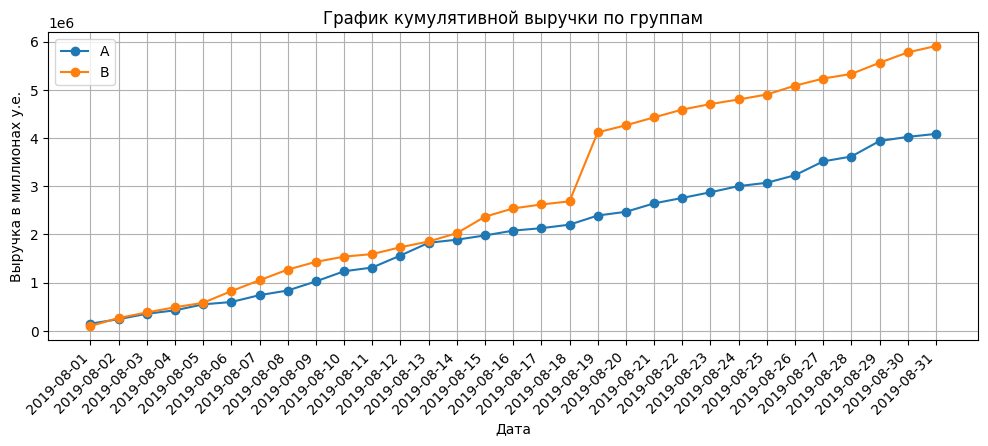

In [25]:
# составление данных для визуализации
plt.figure(figsize=(12,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', marker='o')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', marker='o')
plt.legend()
plt.grid(True)

# получение текущей оси x
ax = plt.gca()

# сдвиг оси x 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# настройки меток оси x
plt.xticks(unique_dates)

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка в миллионах у.е.');

Разобьём график кумулятивной выручки на периоды:

1. **Период 1: 2019-08-01 — 2019-08-05**:

- В этот период кумулятивная выручка групп A и B демонстрирует практически идентичные значения. Различия настолько незначительны, что их трудно визуально различить на графике.

2. **Период 2: 2019-08-05 — 2019-08-18**:

- В течение этого времени кумулятивная выручка группы B начинает опережать группу A. За исключением кратковременного выравнивания значений 13 августа 2019 года, группа B остаётся лидером. Это говорит о том, что группа B демонстрирует лучшие результаты, возможно, за счёт более успешных действий или факторов.

3. **Период 3: 2019-08-18 — до конца исследуемого периода**:

- C 18 по 19 августа 2019 года наблюдается резкий скачок кумулятивной выручки группы B. Причина может быть связана с проведением акции или другим значимым событием, которое повлияло на выручку. С этого момента кумулятивная выручка группы B продолжает значительно превышать результаты группы A.

**Вывод**:

Кумулятивная выручка обеих групп продолжает расти на протяжении всего исследуемого периода, что является ожидаемым результатом.

Группа B показала лучшие результаты по сравнению с группой A. Эти результаты свидетельствуют о том, что условия теста, применённые к группе B, оказали более положительное влияние на пользователей, что со временем привело к значительному увеличению выручки.

## График кумулятивного среднего чека по группам

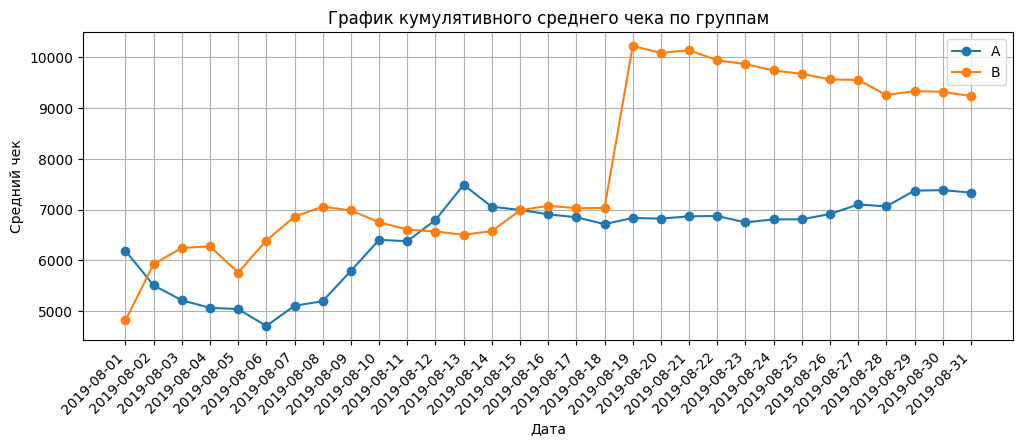

In [26]:
# составление данных для визуализации
plt.figure(figsize=(12,4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', marker='o')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', marker='o')
plt.legend()
plt.grid(True)

# получение текущей оси x
ax = plt.gca()

# сдвиг оси x 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# настройки меток оси x
plt.xticks(unique_dates)

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек');

Разобьём график кумулятивной выручки на периоды:

1. **Период 1: 2019-08-01 — 2019-08-18**:

- В группе A наблюдается начальное снижение среднего чека с 1 по 6 августа 2019 года, за которым следует постепенный рост, который достиг пикового значения 12 августа 2019 года. С 12 по 18 августа средний чек снижается незначительно.
- В этот период кумулятивный средний чек группы B имеет нестабильные показатели - в первые дни чек растет, но в дальнейшем остаётся примерно на одном уровне. Скачки могут связаны с большими покупками в определенные дни.

3. **Период 3: 2019-08-18 — до конца исследуемого периода**:

- С 18 августа по конец исследуемого периода средний чек группы А находится на одном уровне
- 18 августа 2019 года наблюдается такой же резкий скачок среднего чека группы B. Возможные причины всё те же - возможное проведение акции или значимого события. Средний чек группы B немного уменьшается с 19 августа 2019 года, что может говорить о том, что покупателей по акции становится меньше. Покупатели, наиболее заинтересованные в предложении, сделали свои покупки в первый дни.


**Вывод**:


Средний чек в группе A сначала снизился, а затем начал расти, что может указывать на постепенную адаптацию пользователей к изменениям. В группе B чек сначала рос стабильно, затем резко увеличился и после этого начал снижаться, что может свидетельствовать о краткосрочном эффекте, например, от акции.

In [27]:
# кумулятивная выручка
cumulative_revenue = orders.groupby(['date', 'group'])\
.agg({'revenue': 'sum'}).groupby('group').cumsum().reset_index()

cumulative_revenue

,date,group,revenue
0,2019-08-01,A,148579
1,2019-08-01,B,101217
2,2019-08-02,A,242401
3,2019-08-02,B,266748
4,2019-08-03,A,354874
...,...,...,...
57,2019-08-29,B,5559398
58,2019-08-30,A,4022970
59,2019-08-30,B,5774631
60,2019-08-31,A,4084803


## График относительного изменения кумулятивного среднего чека (группа B к группе A)

In [28]:
# составление данных для визуализации
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


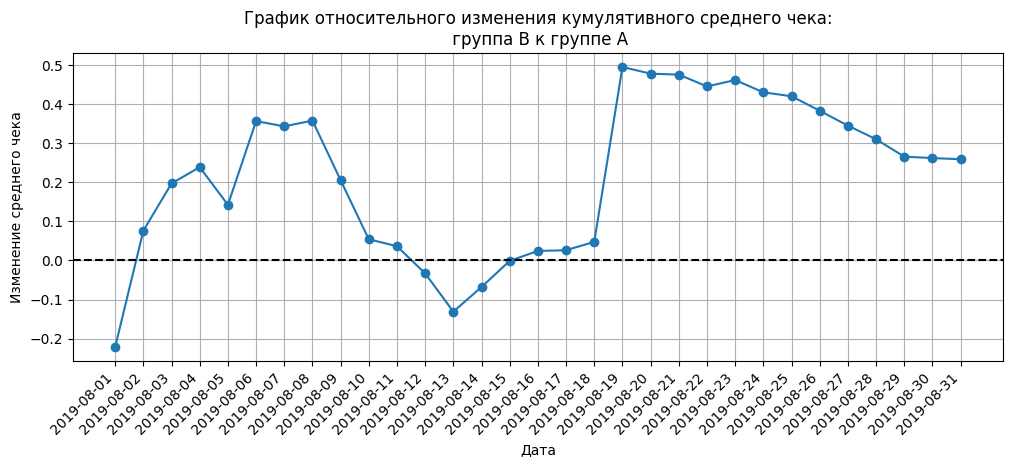

In [29]:
# построение графика
plt.figure(figsize=(12,4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, marker='o')
plt.grid(True)

plt.axhline(y=0, color='black', linestyle='--')

# получение текущей оси x
ax = plt.gca()

# сдвиг оси x 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# настройки меток оси x
plt.xticks(unique_dates)

# именование графика и осей
plt.title('График относительного изменения кумулятивного среднего чека:\n группа В к группе А')
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека');

На полученом графике относительного изменения кумулятивного срднего чека показано сравнение групп с 1 по 31 августа.

- Начало периода - наблюдается резкий рост среднего чека группы B, в сравнении с группой A
- Середина периода - происходит значительное падение, где на небольшой промежуток времени группа A превосходит группу B
- Конец периода - наблюдается резкий скачок среднего чека группы B, где на протяжении всего оставшегося времени группа B является лидирующей, относительно группы A

## График кумулятивного среднего количества заказов на посетителя по группам

In [30]:
# считаем среднее количество заказов на посетителя
cumulativeData['orderspervisitor'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# выводим данные по группам
display(cumulativeDataA.head())
cumulativeDataB.head()

,date,group,buyers,orders,revenue,visitors,orderspervisitor
0,2019-08-01,A,20,24,148579,719,0.03
2,2019-08-02,A,38,44,242401,1338,0.03
4,2019-08-03,A,62,68,354874,1845,0.04
6,2019-08-04,A,77,84,425699,2562,0.03
8,2019-08-05,A,100,109,549917,3318,0.03


,date,group,buyers,orders,revenue,visitors,orderspervisitor
1,2019-08-01,B,20,21,101217,713,0.03
3,2019-08-02,B,43,45,266748,1294,0.03
5,2019-08-03,B,59,61,380996,1803,0.03
7,2019-08-04,B,75,78,489567,2573,0.03
9,2019-08-05,B,98,101,581995,3280,0.03


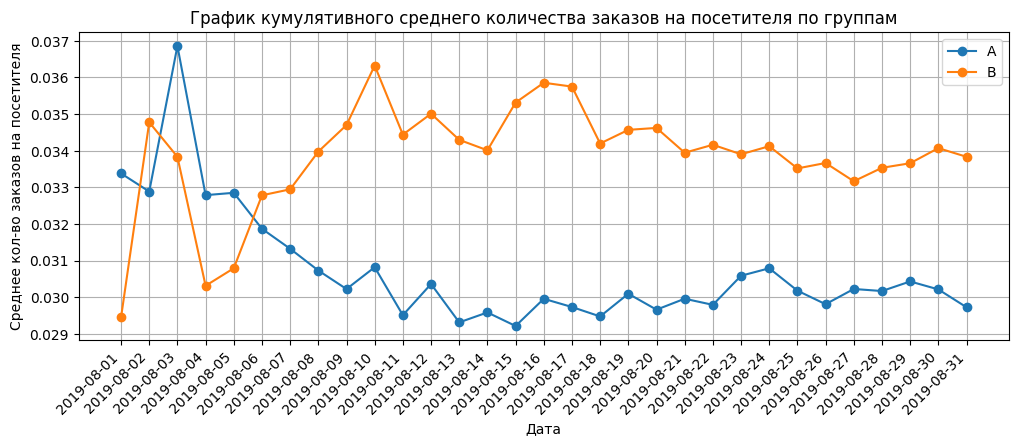

In [31]:
# построение графика
plt.figure(figsize=(12,4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['orderspervisitor'], label='A', marker='o')
plt.plot(cumulativeDataB['date'], cumulativeDataB['orderspervisitor'], label='B', marker='o')
plt.legend()
plt.grid(True)

# получение текущей оси x
ax = plt.gca()

# сдвиг оси x 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# настройки меток оси x
plt.xticks(unique_dates);

# именование графика и осей
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее кол-во заказов на посетителя');

Полученный нами график кумулятивного среднего количества заказов по группам можно поделить на два периода:
- Начало периода - у обеих групп происходят скачки среднего количества заказов, и в определенный момент группа A становится лидерам по этому значению
- Середина периода - к 6 августа лидером становится группа B и набирает явное преимущество, относительно группы A, которая демонстрирует снижение значения.
- Конец периода - с середины и по конец изучаемого периода среднее количество заказов в обоих группах остаётся примерно на одном и том же уровне.

Вероятно все эти скачки связаны с выбросами в исследуемых данных, но общая картина видна в любом случае - группа B является несомненным лидером.

## График относительного изменения кумулятивного среднего количества заказов на посетителя (группа B к группе A)

In [32]:
# объединим таблицы cumulativeDataA и cumulativeDataB
mergedCumulativeConversions = cumulativeDataA.merge(cumulativeDataB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# вывод данных
mergedCumulativeConversions.head()

,date,groupA,buyersA,ordersA,revenueA,visitorsA,orderspervisitorA,groupB,buyersB,ordersB,revenueB,visitorsB,orderspervisitorB
0,2019-08-01,A,20,24,148579,719,0.03,B,20,21,101217,713,0.03
1,2019-08-02,A,38,44,242401,1338,0.03,B,43,45,266748,1294,0.03
2,2019-08-03,A,62,68,354874,1845,0.04,B,59,61,380996,1803,0.03
3,2019-08-04,A,77,84,425699,2562,0.03,B,75,78,489567,2573,0.03
4,2019-08-05,A,100,109,549917,3318,0.03,B,98,101,581995,3280,0.03


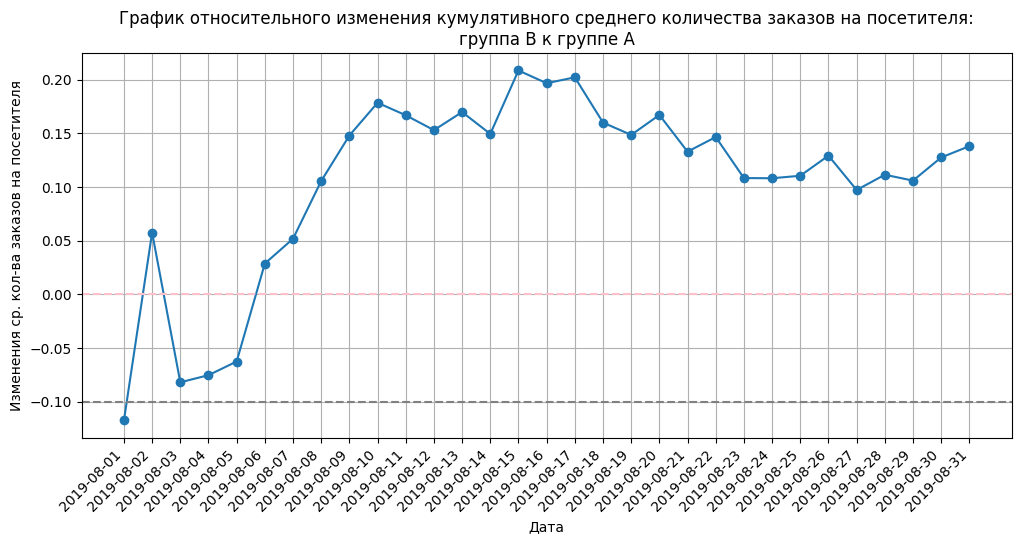

In [33]:
# визуализация данных
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['orderspervisitorB']/mergedCumulativeConversions['orderspervisitorA'] -1, marker='o')
plt.axhline(y=0, color='pink', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.grid(True)

# получение текущей оси x
ax = plt.gca()

# сдвиг оси x 
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# настройки меток оси x
plt.xticks(unique_dates)

# именование графика и осей
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя:\nгруппа B к группе A')
plt.xlabel('Дата')
plt.ylabel('Изменения ср. кол-ва заказов на посетителя');

Рассмотрев график относительного изменения кумулятивного среднего количества заказов можно заметить, как в начале периода имеется резкий скачок среднего количества заказов с -0.1 до 0.05, таких скачков на графике больше нет. Сложно сказать, чем конкретно обусловлен так скачок, вероятно при фильтрации данных мы сможем визуализировать картину более точно. Если же рассматривать данные в следующие дни, то можно с уверенностью сказать, что с начала до середины изучаемого периода средний чек группы B растёт по отношению к группе A. С середины по конец изучаемого периода средний чек остаётся примерно на одном и том же уровне разницы с группой A.

## Точечный график количества заказов по пользователям

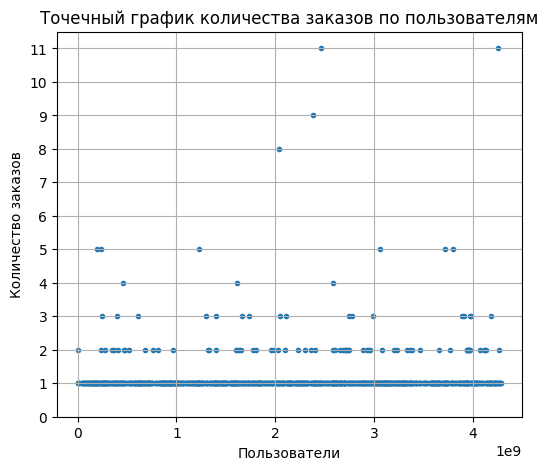

In [34]:
# подготовка данных
data = orders.groupby('visitorid', as_index=False)['transactionid'].nunique()
data.columns=['users', 'orders']

# построение диаграммы рассеяния
plt.figure(figsize=(6,5))
plt.scatter(data['users'], data['orders'], marker='.')
plt.grid(True)

# настройки меток оси y
plt.yticks(np.arange(0, 12, step=1))

# именование диаграммы рассеяния и ее осей
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов');

Выведем информацию о процентном соотношении количества покупок к общему числу покупок.

In [35]:
# создание сводной таблицы
grouped_data = data.pivot_table(
    index='orders',
    values='users',
    aggfunc='count'
).reset_index()

# добавление столбца процентного соотношения
grouped_data['percentage'] = round(grouped_data['users'] / grouped_data['users'].sum() * 100, 2)
grouped_data

,orders,users,percentage
0,1,937,90.88
1,2,64,6.21
2,3,17,1.65
3,4,3,0.29
4,5,6,0.58
5,8,1,0.10
6,9,1,0.10
7,11,2,0.19


На диаграмме рассеяния отчетливо видно, что наибольшая часть пользователей совершает 1 покупку, и значительно меньше 2 покупки.
Наименьшая часть покупок приходится на более чем 2 покупки, где максимальным количеством покупок являются рекордные 11.

## 95-й и 99-й перцентили количества заказов на пользователя.

In [36]:
print(np.percentile(data['orders'], [95, 99]))

[2. 4.]


В 95% случаях количество покупок от 1 до 2, и лишь 1% пользователей покупал более 4-ых раз.

Пользователей стоит считать аномальными, которые совершали более чем 4 заказа. 

## Точечный график стоимостей заказов.

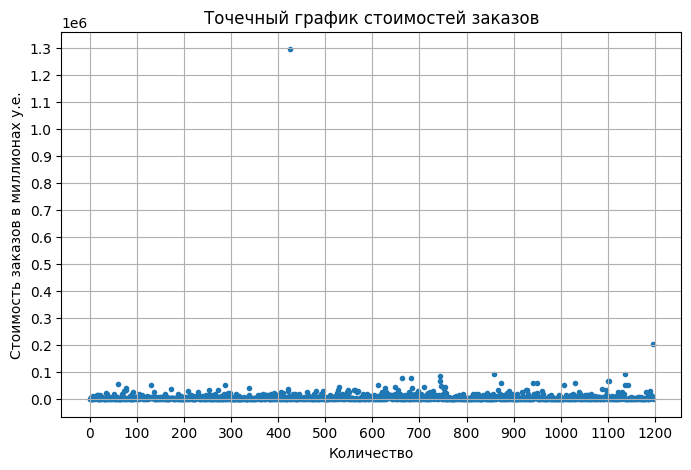

In [37]:
# визуализация данных
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(8,5))
plt.scatter(x_values, orders['revenue'], marker='.')
plt.grid(True)

# именование графика и осей
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество')
plt.ylabel('Стоимость заказов в миллионах у.е.');

# настройки меток оси x и y
plt.yticks(np.arange(0, 1400000, step=100000));
plt.xticks(np.arange(0, 1300, step=100));

Точечный график стоимостей заказов показывает, что в данных имеются очевидные два выброса, находящиеся очень далеко от всей "массы" стоимостей. Также по этому графику сложно определить

## 95-й и 99-й перцентили стоимости заказов

In [38]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


В 95% случаях стоимость заказа не превышала 28000 у.е., и лишь 1% заказов имело стоимость выше 58233.2 у.е.

Определив 95-й и 99-й перцентили стоимости заказов, мы можем подробнее изучить точечный график стоимостей заказов исключив аномалии (возьмём за верхнюю границу значение 95-ого перцентиля):

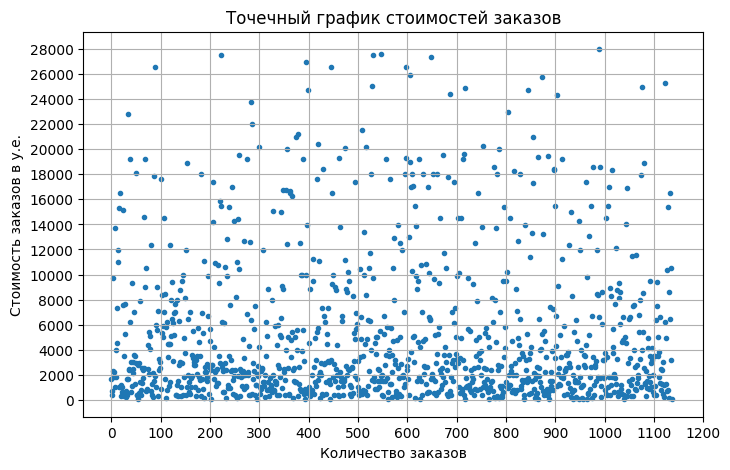

In [39]:
# фильтрация данных
filtered_orders = orders.loc[orders['revenue'] <= 28000]
x_filt_values = pd.Series(range(0, len(filtered_orders['revenue'])))

# визуализация данных
plt.figure(figsize=(8,5))
plt.scatter(x_filt_values, filtered_orders['revenue'], marker='.')
plt.grid(True)

# именование графика и осей
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Стоимость заказов в у.е.');

# настройки меток оси x и y
plt.yticks(np.arange(0, 30000, step=2000))
plt.xticks(np.arange(0, 1300, step=100));

Из полученной диаграммы рассеяния можно сказать, что большая часть заказов приходится на стоимость от 0 до 6000 у.е.

Проверим предположение.

In [40]:
filtered_orders['revenue'].describe()

count    1137.00
mean     5168.15
std      5831.00
min        50.00
25%      1188.00
50%      2750.00
75%      6716.00
max     27985.00
Name: revenue, dtype: float64

Действительно, большая часть заказов находится в промежутке до ~7000 у.е. за единицу. Медианное значение при таком разбросе данных является более точным, в установлении среднего значения, и является ~2750 y.e. за единицу товара.

## Статистическая значимость различий в среднем количестве заказов на посетителя

На основе графиков среднего количества заказов на посетителя видно, что распределения данных не являются нормальными. В таких случаях целесообразно использовать непараметрические методы анализа. Для сравнения двух независимых выборок, когда данные не соответствуют нормальному распределению, применяют тест Манна-Уитни.

Непараметрический тест:
1. **Тип теста**: Непараметрический
2. **Гипотеза**: Двусторонняя (A ≠ B)
3. **Тест**: Тест Манна-Уитни

На основе исходных данных сформулируем нулевую и альтернативную гипотезы:

- **Нулевая гипотеза (H₀)**:  **Нет** статистически значимых различий в среднем количестве заказов на посетителя между группами A и B по «сырым» данным.
- **Альтернативная гипотеза (H₁)**:  **Есть** статистически значимые различия в среднем количестве заказов на посетителя между группами A и B по «сырым» данным.

Установим критический уровень статистической значимости 5%

Теперь проведём проверку гипотез:

In [41]:
# сгруппируем данные по группе A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid' : pd.Series.nunique})
)
ordersByUsersA.columns = ['userid', 'orders']

# сгруппируем данные по группе B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid' : pd.Series.nunique})
)

ordersByUsersB.columns = ['userid', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(visitorsAggregated[visitorsAggregated['group']=='A']['visitors'].max() - len(ordersByUsersA['orders'])), name = 'orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(visitorsAggregated[visitorsAggregated['group']=='B']['visitors'].max() - len(ordersByUsersB['orders'])), name = 'orders')], axis=0)

In [42]:
# татистическая значимость различий между группами
stat, p_value = stats.mannwhitneyu(sampleA, sampleB)
print(f'P-значение: {p_value}\n')

# проверка на статистическую значимость
if p_value < 0.05:
    print('Есть статистически значимые различия в среднем количестве заказов на посетителя между группами.\n')
else:
    print('Нет статистически значимых различий в среднем количестве заказов на посетителя между группами.\n')

difference = sampleB.mean()/sampleA.mean() - 1
print(f'Отличие среднего числа заказов по отношению группы B к группе А: {round(difference, 3)}')

P-значение: 0.016792355056752608

Есть статистически значимые различия в среднем количестве заказов на посетителя между группами.

Отличие среднего числа заказов по отношению группы B к группе А: 0.138


1. Полученное p-value **1.6%** меньше уровня статистической значимости **5%**, следовательно нулевая гипотеза должна быть отвергнута. 

2. Таким образом, мы можем сделать вывод, что существуют статистически значимые различия в среднем количестве заказов на посетителя между группами A и B по "сырым" данным.

3. Кроме того, анализ показал, что среднее количество заказов на посетителя в группе B на 13.8% выше, чем в группе A. Это свидетельствует о том, что изменения, связанные с группой B, привели к увеличению количества заказов.

## Статистическая значимость различий в среднем чеке заказа между группами

На основе исходных данных сформулируем нулевую и альтернативную гипотезы:

- **Нулевая гипотеза (H₀)**:  **Нет** статистически значимых различий в среднем чеке заказа между группами A и B по «сырым» данным.
- **Альтернативная гипотеза (H₁)**:  **Есть** статистически значимые различия в среднем чеке заказа между группами A и B по «сырым» данным.

Установим критический уровень статистической значимости на уровне 5% (α = 0.05).

Теперь проведём проверку гипотез:

In [43]:
# средний чек по группам
revenueA = orders[orders['group'] == 'A']['revenue']
revenueB = orders[orders['group'] == 'B']['revenue']

# статистическая значимость различий среднего чека между группами
stat, p_value = stats.mannwhitneyu(revenueA, revenueB)
print(f'p-значение: {p_value}\n')

# проверка на статистическую значимость
if p_value < 0.05:
    print('Есть статистически значимые различия в среднем чеке заказа между группами.\n')
else:
    print('Нет статистически значимых различий в среднем чеке заказа между группами.\n')

# относительный прирост среднего чека заказа между группами
relative_increase = revenueB.mean() / revenueA.mean() - 1
print(f'Отличие среднего чека заказов по отношению группы B к группе А: {round(relative_increase, 3)}')

p-значение: 0.7292909855432458

Нет статистически значимых различий в среднем чеке заказа между группами.

Отличие среднего чека заказов по отношению группы B к группе А: 0.259


1. Полученное p-value **7.3%** выше уровня статистической значимости **5%**, следовательно нулевая гипотеза не отвергнута, а альтернативная отвергнута.

2. Отличие среднего чека заказов по отношению группы B к группе A составляет **25.9%**, но это различие не является статистически значимым.

## Статистическая значимость различий в среднем количестве заказов на посетителя

### Фильтрация данных

В предыдущих расчётах были установлены 95-й и 99-й перцентили для среднего чека и среднего количества заказов:

1. Средний чек:
   - 99-й = 58233.20 y.e.
   - 95-й = 28000 y.e.
2. Среднего количество заказов:
   - 99-й = 4 заказа
   - 95-й = 2 заказа
  
Примем за аномальных пользователей тех, кто совершил выше 4 заказов или совершил заказы выше 28000 у.е..

In [44]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(data['orders'], 99)]['userid'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(data['orders'], 99)]['userid']
    ],
    axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorid']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormalUsers.head(5))
abnormalUsers.shape[0]

1099    148427295
928     204675465
684     358944393
648     382846391
1189    393266494
dtype: int64

59

Всего 59 аномальных пользователей. 

In [45]:
uniq = orders['visitorid'].nunique()
print(f'Процентное соотношение удалённых пользователей от общего количества: {round(abnormalUsers.shape[0] / uniq, 3)}')

Процентное соотношение удалённых пользователей от общего количества: 0.057


При фильтрации данных было удалено примерно 5.7% пользователей.

### Формулирование и проверка гипотез

На основе обновлённых отфильтрованных данных сформулируем гипотезы:

- **Нулевая гипотеза (H₀)**: Нет статистически значимых различий в среднем количестве заказов между группами A и B по отфильтрованным данным.
- **Альтернативная гипотеза (H₁)**: Есть статистически значимые различия в среднем количестве заказов между группами A и B по отфильтрованным данным.

Установим критический уровень статистической значимости на уровне 5% (α = 0.05).

Далее проведём проверку гипотез:

In [46]:
# фильтрация данных группы A
sampleA_filtered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['userid'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(visitorsAggregated[visitorsAggregated['group']=='A']['visitors']
                                 .max() - len(ordersByUsersA['orders'])), name='orders')
], axis=0)

# фильтрация данных группы B
sampleB_filtered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['userid'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(visitorsAggregated[visitorsAggregated['group']=='B']['visitors']
                                 .max() - len(ordersByUsersB['orders'])), name='orders')
], axis=0)


# статистическая значимость различий между группами
stat, p_value = stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)
print(f'P-значение: {round(p_value, 3)}\n')

# проверка на статистическую значимость
if p_value < 0.05:
    print('Есть статистически значимые различия в среднем количестве заказов на посетителя между группами.\n')
else:
    print('Нет статистически значимых различий в среднем количестве заказов на посетителя между группами.\n')

print(f'Отличие среднего числа заказов по отношению группы B к группе А: {round((sampleB_filtered.mean()/sampleA_filtered.mean() -1), 3)}')

P-значение: 0.018

Есть статистически значимые различия в среднем количестве заказов на посетителя между группами.

Отличие среднего числа заказов по отношению группы B к группе А: 0.145


1. Полученное p-value **1.8%** меньше уровня статистической значимости **5%**, следовательно нулевая гипотеза говорящая об отсутствии статистически значимых отличий должна быть отвергнута. 

2. Исходя из полученных данных можно сделать вывод, что **фильтрация данных незначительно повлияла на результат** теста Манна-Уитни, и **статистически значимые различия** в среднем количестве заказов на посетителя между группами **присутствуют**.

3. Кроме того, анализ показал, что среднее количество заказов на посетителя в группе B на 14.5% выше, чем в группе A. Процент группы B после фильтрации данных выше, чем до фильтрации, что говорит о большей эффективности группы B не учитывая аномальных пользователей.

## Cтатистическая значимость различий в среднем чеке заказа

На основе обновлённых отфильтрованных данных сформулируем гипотезы:

- **Нулевая гипотеза (H₀)**: Нет статистически значимых различий в среднем чеке заказов между группами A и B по отфильтрованным данным.
- **Альтернативная гипотеза (H₁)**: Есть статистически значимые различия в среднем чеке заказов между группами A и B по отфильтрованным данным.

Установим критический уровень статистической значимости на уровне 5% (α = 0.05).

Далее проведём проверку гипотез:

In [47]:
# отфильтрованные данные по группам
filtered_revenueA = orders[np.logical_and(
    orders['group'] == 'A', 
    np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue']

filtered_revenueB = orders[np.logical_and(
    orders['group'] == 'B', 
    np.logical_not(orders['visitorid'].isin(abnormalUsers)))]['revenue']

# Статистическая значимость различий среднего чека между группами
stat, p_value = stats.mannwhitneyu(filtered_revenueA, filtered_revenueB)
print(f'p-значение: {round(p_value, 3)}\n')

# поверка на статистическую значимость
if p_value < 0.05:
    print('Есть статистически значимые различия в среднем чеке заказа между группами.\n')
else:
    print('Нет статистически значимых различий в среднем чеке заказа между группами.\n')

# относительный прирост среднего чека заказа группы B к группе А
relative_increase = filtered_revenueB.mean() / filtered_revenueA.mean() - 1
print(f'Отличие среднего чека заказов по отношению группы B к группе А: {round(relative_increase, 3)}')

p-значение: 0.961

Нет статистически значимых различий в среднем чеке заказа между группами.

Отличие среднего чека заказов по отношению группы B к группе А: -0.014


1. Полученное p-value **9.6%** выше уровня статистической значимости **5%**, следовательно альтернативная гипотеза, говорящая о присутствии значимых различий должна быть отвергнута. 

2. До фильтрации данных p-value равнялось **7.3%**, что говорит о том, что **фильтрация данных незначительно повлияла на результат** теста Манна-Уитни.

3. До фильтрации данных отличие среднего заказа между группой B к группе A равнялось **25.9%** в сторону группы B, но после фильтрации составило отрицательное значение - **-1.4%**. В любом случае, это значение не имеет статистической значимости.

## Решение по результатам теста

Выводы полученные на основе проверки гипотез:

1. **Конверсия** в группе B **выше**, чем в группе A как по сырым, так и по отфильтрованным данным. Фильтрация данных немного увеличила этот прирост, что говорит о большей устойчивости результатов группы B.
2. **Средний чек** в группах A и B практически **не изменился** после фильтрации данных. Как по сырым, так и по отфильтрованным данным, статистически значимых различий в среднем чеке между группами нет.

# Вывод

1. Исходя из первой части работы, можно сказать, что лидирующей гипотезой для проведения тестов является гипотеза выявленная методом `RICE` - Гипотеза 2 - **"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"**
2. Одной из причин роста среднего чека **группы B** является введение **акции**, результатом которой стал резкий скачок выручки. Стоит обратить внимание на результаты этого события и взять во внимание идею о проведении новых значимых событий или акций.
3. Фильтрация данных показала, что аномальные заказы могут влиять на результаты анализа, хоть и конкретно данном случае фильтрация не повлияла на исход гипотез.
4. В результате анализа среднего чека и конверсии групп A/B-теста было выявлено, что средний чек в группах примерно одинаков, а  конверсия группы B на 17% больше группы A. Таким образом однозначным победителем A/B-теста является **группа B** и проведение теста можно завершать.